In [1]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import unittest

def nash_equlibrium(a):
    m, n = a.shape 
    
    #здесь минимизируем со знаком > (lines)
    c = np.ones((m,))
    b_ub = np.ones((n,))
    b_ub = -1 * b_ub
    a_new = -1 * np.transpose(a)
    res1 = linprog(c, A_ub = a_new, b_ub = b_ub)
    v, p = 1.0/res1.fun, res1.x
    p = v * p
    
    #максимизируем со знаком < (columns)
    c2 = np.ones((n,))
    c2 = -1 * c2
    b_ub2 = np.ones((m,))
    res2 = linprog(c2, A_ub = a, b_ub = b_ub2)
    q = res2.x
    q = v * q
    return v, p, q

def show_res(a):
    v, p, q = nash_equlibrium(a)
    m, n = a.shape
    print(' v =', v, '\n','p =', p, '\n','q =', q)
    
    plt.scatter(range(1, n + 1), p, color = 'blue')
    plt.xlabel('Номер стратегии 1 игрока')
    plt.ylabel('Вероятность использования стратегии')
    plt.grid()
    plt.show()
    
    plt.scatter(range(1, m + 1), q, color = 'blue')
    plt.xlabel('Номер стратегии 2 игрока')
    plt.ylabel('Вероятность использования стратегии')
    plt.grid()
    plt.show()
    
    
def test_nash_equlibrium_a1():
    a = np.array([[0, 2], [3, 1], [4, -3]])
    v, p, q = nash_equlibrium(a)
    assertEqual(v, 0.888818888889)


#### Пример 1
Спектр оптимальной стратегии состоит из одной точки (т.е. существует равновесие Нэша в чистых стратегиях)

 v = 5.0 
 p = [ 0.  1.  0.  0.  0.] 
 q = [ 0.  0.  1.  0.  0.]


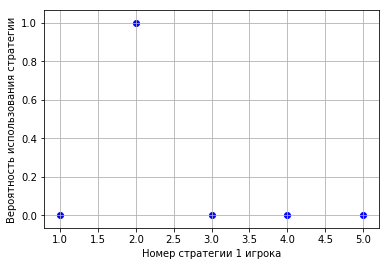

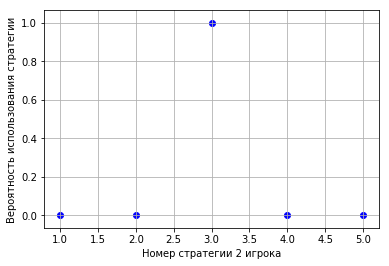

In [6]:
a = np.array([[3, 9, 2, 1, 1], 
              [7, 8, 5, 6, 8], 
              [4, 7, 3, 5, 7], 
              [5, 6, 1, 7, 7],
              [6, 7, 1, 4, 5]])
show_res(a)

#### Пример 2
Спектр оптимальной стратегии неполон (т.е. некоторые чистые стратегии не используются)

 v = 4.87096774194 
 p = [ 0.          0.12903226  0.09677419  0.43548387  0.33870968  0.        ] 
 q = [ 0.          0.          0.69086022  0.14516129  0.14784946  0.01612903]


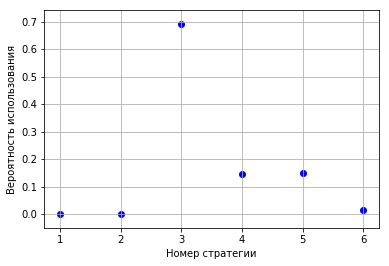

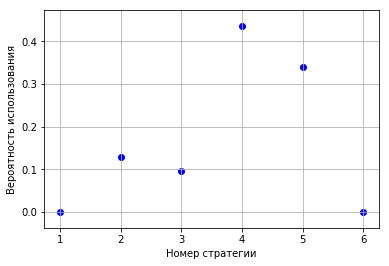

In [55]:
a = np.array([[4,0,6,2,2,1],
              [3,8,4,10,4,4],
              [1,2,6,5,0,0],
              [6,6,4,4,10,3],
              [10,4,6,4,0,9],
              [10,7,0,7,9,8]])
show_res(a)

#### Пример 3
Спектр оптимальной стратегии полон

 v = 2.5 
 p = [ 0.25  0.25  0.25  0.25] 
 q = [ 0.25  0.25  0.25  0.25]


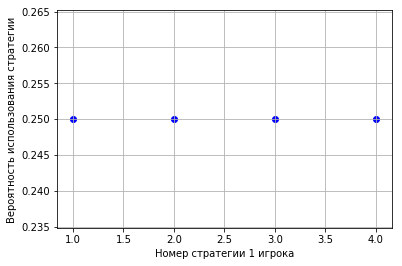

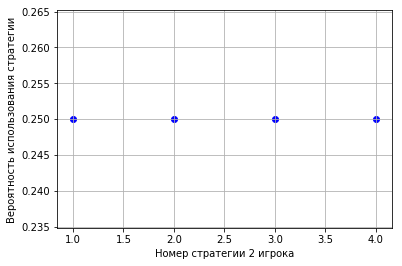

In [5]:
a = np.array([[1, 2, 3, 4], 
              [2, 3, 4, 1],
              [3, 4, 1, 2], 
              [4, 1, 2, 3]])
show_res(a)